In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

filepath_train = "HospitalAdmissionsData.csv";
train = pd.read_csv(filepath_train)

print("These are the columns/features")
train.columns

Index(['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type',
       'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1',
       'Race', 'Dx'],
      dtype='object')

In [15]:
# train.info()
print("This many features are integers")
len(train.describe(include = "int64").columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58863 entries, 0 to 58862
Data columns (total 10 columns):
ID                     58863 non-null int64
AdmissionLengthDays    58863 non-null float64
Death_1                58863 non-null int64
Admission_Type         58863 non-null object
Insurance_Type         58863 non-null object
EnglishLanguage_1      58863 non-null int64
Religion_Type          58408 non-null object
Married_1              58863 non-null int64
Race                   58863 non-null object
Dx                     58863 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 4.5+ MB
This many features are integers


4

In [16]:
print("This many features are floats")
len(train.describe(include = "float64").columns)

This many features are floats


1

In [18]:
print("These features are objects")
train.describe(include = "object").columns

These features are objects


Index(['Admission_Type', 'Insurance_Type', 'Religion_Type', 'Race', 'Dx'], dtype='object')

In [23]:
print("These are the possible 'values' for insurance type " )
train["Insurance_Type"].unique()

These are the possible 'values' for insurance type 


array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

In [26]:
train["AdmissionLengthDays"].describe()

count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64

In [33]:
print("Most common admission type is " + train["Admission_Type"].value_counts().idxmax())


Most common admission type is emergency


In [34]:
print("Most common insurance type is " + train["Insurance_Type"].value_counts().idxmax())


Most common admission type is medicare


In [38]:
print("Most common religion type is " + train["Religion_Type"].value_counts().idxmax())


Most common admission type is catholic


In [37]:
print("Most common race is " + train["Race"].value_counts().idxmax())


Most common admission type is white


In [39]:
print("Most common diagnosis is " + train["Dx"].value_counts().idxmax())

Most common diagnosis is newborn


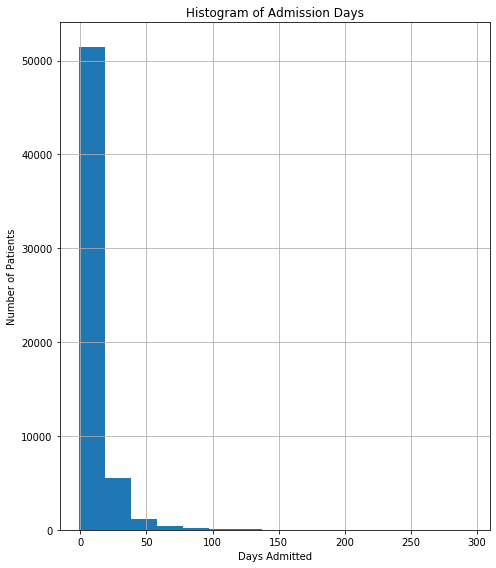

In [50]:
train["AdmissionLengthDays"].hist(figsize=(7,8), bins = 15);
plt.title('Histogram of Admission Days')
plt.xlabel('Days Admitted')
plt.ylabel('Number of Patients')
plt.tight_layout() 

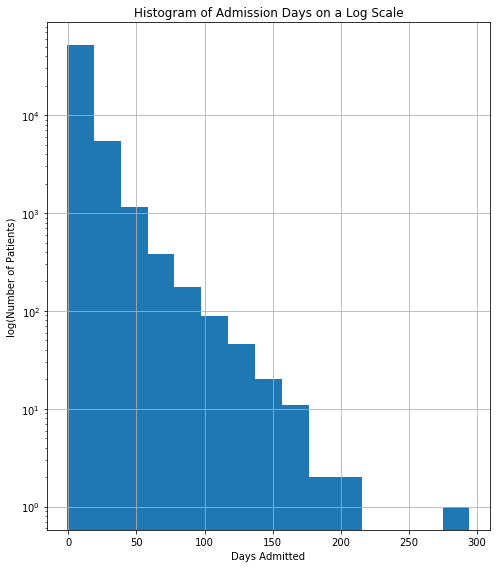

In [51]:
train["AdmissionLengthDays"].hist(figsize=(7,8), bins = 15, log = True);
plt.title('Histogram of Admission Days on a Log Scale')
plt.xlabel('Days Admitted')
plt.ylabel('log(Number of Patients)')
plt.tight_layout() 

Text(0.5, 0, 'Survival Status (0 = Survived)')

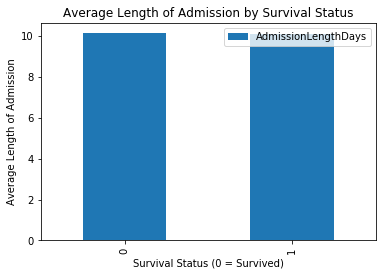

In [61]:
# Compare the average length of admission between those who died versus those who did not die. 
# Show a visualization, with appropriate labels, titles, etc.
trainbar = train.groupby('Death_1').mean()
trainbar.plot.bar(y=['AdmissionLengthDays'])
plt.title('Average Length of Admission by Survival Status')
plt.ylabel('Average Length of Admission (days)')
plt.xlabel('Survival Status (0 = Survived)')

Death_1             0     1
Insurance_Type             
government       1691    90
medicaid         5400   381
medicare        24253  3904
private         21152  1382
self pay          515    95


Text(0.5, 1.0, 'Association between Death and Insurance Type')

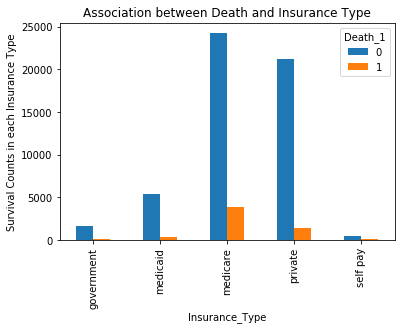

In [67]:
# Describe the association between death and insurance type and show a visualization or test.
trainSurvivedPclass = pd.crosstab(train.Insurance_Type, train.Death_1)
print(trainSurvivedPclass)

trainSurvivedPclass.plot.bar()
plt.ylabel('Survival Counts in each Insurance Type')
plt.title("Association between Death and Insurance Type")